# Texas Saftey Analysis
---
### As part of this activity, Criminal activity by each county will be analyzed and will be assigned as livablity score.

--- 
Reference and Dataset Link: https://data.texas.gov/browse?Dataset-Category_Category-Tile=Public+Safety

---

**-- Limitation : --** Only 2019 and 2020 data set is available and the liviablity score evaluations is done only for these 2 years

## Dependencies and Setup

In [6]:
# import required libiraries/packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import  pprint


In [8]:
# Import datasets csv file or import data set through API

# Read the data
safety_2019 = pd.read_csv("../Resources/Texas_Department_of_Criminal_Justice_Receives_FY_2019.csv")
safety_2020 = pd.read_csv("../Resources/Texas_Department_of_Criminal_Justice_Releases_FY_2020.csv")

# Create dataframe


In [13]:
# Remove duplicates in CSV

safety_2019 = safety_2019.drop_duplicates()
safety_2019.to_csv('cleaned_2019.csv', index=False)

safety_2020 = safety_2020.drop_duplicates()
safety_2020.to_csv('cleaned_2020.csv', index=False)

df1_filtered = safety_2019[(pd.to_numeric(pd.to_datetime(safety_2019['Offense Date']).dt.strftime('%Y')) >= 2017) & ((pd.to_numeric(pd.to_datetime(safety_2019['Offense Date']).dt.strftime('%Y'))) < 2020)]
df2_filtered = safety_2020[(pd.to_numeric(pd.to_datetime(safety_2020['Offense Date']).dt.strftime('%Y')) >= 2017) & ((pd.to_numeric(pd.to_datetime(safety_2020['Offense Date']).dt.strftime('%Y'))) < 2021)]


safety_2019_selcols = pd.DataFrame(df1_filtered[['County', 'Offense', 'Offense Description', 'Offense Date']])
safety_2020_selcols = pd.DataFrame(df2_filtered[['County', 'Offense', 'Offense Description', 'Offense Date']])

merged_df = pd.concat([safety_2019_selcols,safety_2020_selcols],axis=0)
merged_df = merged_df.drop_duplicates()

# Formatting the Dataframe 
merged_df = merged_df.sort_values(by=['County','Offense Date'],ascending=True).reset_index(drop=True)
merged_df['Offense Year'] = pd.to_datetime(merged_df['Offense Date']).dt.strftime('%Y')

# Display Dataframe
merged_df.head()


,County,Offense,Offense Description,Offense Date,Offense Year
0,Anderson,Drug,POSS CS PG 1 >=1G<4G,01/03/2017,2017
1,Anderson,Drug,POSS CONT SUBS PG1 1-4G,01/03/2017,2017
2,Anderson,Property,"THEFT PROP <$2,500 2/MORE PREV CONV",01/06/2018,2018
3,Anderson,Property,THEFT PROP L/$2500 2/MORE PREV,01/06/2018,2018
4,Anderson,Other,DRIVING WHILE INTOXICATED W/CHILD UNDER 15 YOA,01/15/2018,2018


In [50]:
# Create a new column with the count of offenses for each combination of County, Offense, and Offense Year
OffenseCountByCountyDF = merged_df.groupby(['County','Offense Year'],as_index=False).agg({'Offense': 'count'})
OffenseCountByCountyDF.head()

,County,Offense Year,Offense
0,Anderson,2017,71
1,Anderson,2018,52
2,Anderson,2019,5
3,Andrews,2017,22
4,Andrews,2018,21


In [49]:
#groupby county and offense
OffenseCountByCountyAndYearDF = merged_df.groupby(['County', 'Offense', 'Offense Year']).agg({'Offense': 'count'})
OffenseCountByCountyAndYearDF

Offense
County   Offense Offense Year         
Anderson Drug    2017               29
                 2018               16
         Other   2017               20
                 2018               23
                 2019                3
...                                ...
Zavala   Drug    2017                1
                 2018                1
         Other   2017                6
         Violent 2017                3
                 2018                2

[2195 rows x 1 columns]

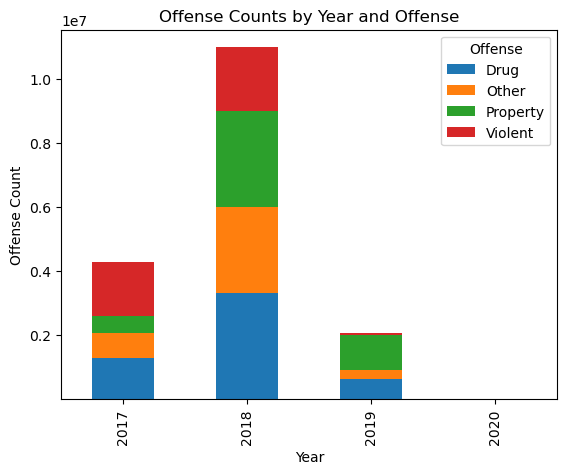

In [29]:
# generate a stacked barplot for the county and offense count
# Group the DataFrame by Offense Year and Offense, and sum the Offense Count

OffenseCountYearDF = merged_df.groupby(['Offense Year', 'Offense'])['Offense Count'].sum()

# Unstack the resulting Series to create a DataFrame with Offense Year as columns
stacked = OffenseCountYearDF.unstack()

# Plot the stacked bar plot
stacked.plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Offense Counts by Year and Offense')
plt.xlabel('Year')
plt.ylabel('Offense Count')

# Show the plot
plt.show()

In [52]:
# Generating summary Statistics
mean  = OffenseCountByCountyDF['Offense'].mean()
median = OffenseCountByCountyDF['Offense'].median()
variance = OffenseCountByCountyDF['Offense'].var()
StdDev = OffenseCountByCountyDF['Offense'].std()

In [56]:
summary_table = pd.DataFrame({"Mean_Offense":mean,"Median_Offense":median,"Variance_Offense":variance,"Offense_Std. Dev.":StdDev}).reset_index(drop=True,inplace=True)
summary_table

ValueError: If using all scalar values, you must pass an index

In [41]:
TexasCountyDF = pd.read_excel('../Resources/Texas_Counties.xlsx')
TexasCountyDF['County'] = TexasCountyDF['Name']
merged_county_df = pd.merge(summary_table,TexasCountyDF, on = 'County' , how='right')

SummaryStatisticsDF = merged_county_df.drop(['Rank','Name','Named For'],axis=1)

# Display Dataframe
SummaryStatisticsDF

,County,Mean_Offense,Median_Offense,Variance_Offense,Offense_Std. Dev.
0,Anderson,18.718750,20.0,63.841535,7.990090
1,Andrews,7.250000,6.0,11.425532,3.380167
2,Angelina,37.017595,34.0,226.834984,15.061042
3,Aransas,12.849057,17.0,44.015239,6.634398
4,Archer,1.800000,2.0,0.177778,0.421637
...,...,...,...,...,...
249,Wood,16.650000,13.0,81.052941,9.002941
250,Yoakum,2.000000,2.0,0.857143,0.925820
251,Young,8.629630,6.0,29.294200,5.412412
252,Zapata,1.000000,1.0,0.000000,0.000000


In [45]:

# Convert variance percent to %
# merged_county_df['Variance_percent'] = merged_county_df['Variance_percent'] .apply(lambda x: "{:.2f}%".format(x))
print(SummaryStatisticsDF['Mean_Offense'].max())
print(SummaryStatisticsDF['Mean_Offense'].min())

820.0714461085195
1.0


In [110]:
merged_county_df = merged_county_df.fillna(0)
print(merged_county_df['Variance_percent'].max())
print(merged_county_df['Variance_percent'].min())

32.95171125794806
0.0


In [120]:
merged_county_df['LIndex'] = np.where(merged_county_df['Variance_percent'] <= 5, 5,
                             np.where(merged_county_df['Variance_percent'] <= 10, 4,
                             np.where(merged_county_df['Variance_percent'] <= 20, 3,
                             np.where(merged_county_df['Variance_percent'] <= 30, 2, 1))))
                                               
                                      
             # np.where((merged_county_df['Variance_percent'] >= 20 & merged_county_df['Variance_percent'] <=30 ), 2,5))

In [124]:
display(merged_county_df)
merged_county_df.to_csv("safety_analysis.csv",index=False)

,County,Mean_Offense,Median_Offense,Variance_Offense,Offense_Std. Dev.,Rank,Name,Named For,Variance_percent,LIndex
0,Anderson,18.718750,20.0,63.841535,7.990090,1,Anderson,K.L. Anderson (1805-45),0.024781,5
1,Andrews,7.250000,6.0,11.425532,3.380167,2,Andrews,Richard Andrews (?-1835),0.004435,5
2,Angelina,37.017595,34.0,226.834984,15.061042,3,Angelina,the Angelina River,0.088050,5
3,Aransas,12.849057,17.0,44.015239,6.634398,4,Aransas,the Aransas River,0.017085,5
4,Archer,1.800000,2.0,0.177778,0.421637,5,Archer,Branch T. Archer (1790-1856),0.000069,5
...,...,...,...,...,...,...,...,...,...,...
249,Wood,16.650000,13.0,81.052941,9.002941,250,Wood,George T. Wood (1795-1858),0.031462,5
250,Yoakum,2.000000,2.0,0.857143,0.925820,251,Yoakum,Henderson K. Yoakum (1810-56),0.000333,5
251,Young,8.629630,6.0,29.294200,5.412412,252,Young,William C. Young (1812-62),0.011371,5
252,Zapata,1.000000,1.0,0.000000,0.000000,253,Zapata,Antonio Zapata y Cisneros (1800-40),0.000000,5
